![](https://github.com/DavidSArbelaez/Parcial_MetricasRendimiento/blob/main/img/logo.png?raw=1)

# 2do Parcial: Análisis Exploratorio de Datos. 

### Nombre de los Estudiantes:
    * David Steven Arbeláez Chávez
### Cédula de Ciudadanía:  
    * 1000 253 275
# Objetivo:

En este cuaderno se busca realizar una serie de ejercicios

---

Se obtiene el dataframe y las imagenes del [repositorio](https://github.com/DavidSArbelaez/Parcial3_Metricas_Rendimiento) de github

# Modelo 
### Descripción de Valores:
|Variable|Descripción|
|-|-|
|Age (numeric)|Edad del deudor|
|Sex (text: male, female)|genero|
|Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)|Trabajo|
|Housing (text: own, rent, or free)|s|
|Saving accounts (text - little, moderate, quite rich, rich)|s|
|Checking account (numeric, in DM - Deutsch Mark)|s|
|Credit amount (numeric, in DM)|
|Duration (numeric, in month)|
|Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)|

## 0. Bibliotecas

Se declaran e importan las biliotecas a utilizar

In [ ]:
import pandas as pd 
import numpy as np
from IPython.display import display, Markdown, Latex
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from pandas import get_dummies
from sklearn import preprocessing
#Se usa este metodo para separar el dataframe en 2, el dataframe para entrenar el modelo y el otro para revisar el modelo
from sklearn.model_selection import train_test_split
sns.set_theme(style="whitegrid")
from sklearn.metrics import recall_score,precision_score,f1_score,accuracy_score, confusion_matrix

## 1. Lectura del dataframe
Se lee el dataframe que esta guardado en un archivo csv y se obtiene a travez del metodo `read_csv()` de la libreria pandas

In [ ]:
link = "https://raw.githubusercontent.com/DavidSArbelaez/Parcial3_Metricas_Rendimiento/main/Modelo_Regresi%C3%B3n_Logisitica/Dataset/german_credit_data.csv"
df = pd.read_csv(link,sep=";")

## 2. Analisis Exploratorio de Datos (**EDA**)

In [ ]:
#Se muestra la información de las variables 
display(Markdown("## Información de las variables:"))
df.info()

## Información de las variables:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [ ]:
#Se muestra las primeras 5 filas
df.head(5)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


Se denota que se tiene 2 variables con datos nulos, por lo que se decide sumar la cantidad de datos nulos que se tiene por cada variable, posteriormente se revisara que tipo de variable (nominal o ordinal) es, para decidir si borrar las filas con datos nulos o usar una de las 2 tecnicas para pasar  **label encode** o `get_dummies`

In [ ]:
#Se imprime la suma de los datos nulos por columna
display(Markdown("## Cantidad de datos nulos por columna:"))
df.isnull().sum()

## Cantidad de datos nulos por columna:

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

### Analisis de las variables categoricas

1) Se necesita saber el comportamiento que tienen las varables entre ellas

2) Se necesita identificar los datos unicos de las variables categoricas para entender que valores contienen, para determinar si son datos ordinales o nomimales

## Cantidad de deudores riesgosos y no riesgosos:

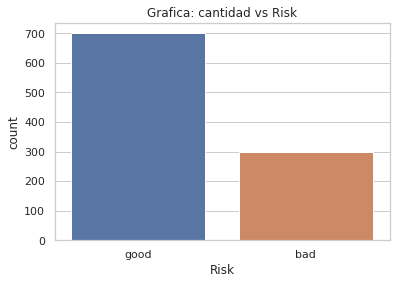

In [ ]:
display(Markdown("## Cantidad de deudores riesgosos y no riesgosos:"))
df['Risk'].value_counts()
sns.countplot(data = df, x = 'Risk')
plt.title('Grafica: cantidad vs Risk')
plt.show()

# Exploración de las datos de las variables de categoricas:

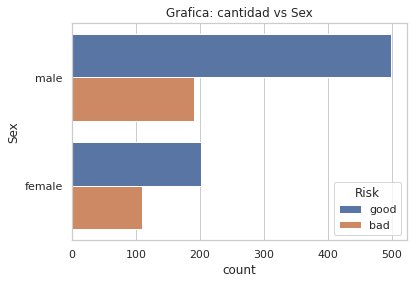

## Cantidad de deudores riesgosos y no riesgosos por genero:

Risk  Sex   
good  male      499
      female    201
bad   male      191
      female    109
dtype: int64
*******************************************************************************


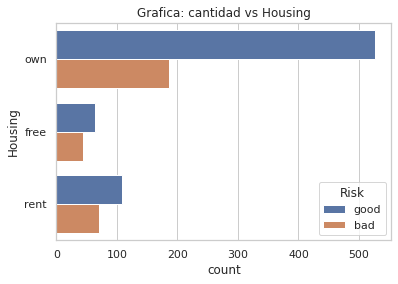

## Cantidad de deudores que poseen una casa, rentan o ninguna:

Housing
own        713
rent       179
free       108
dtype: int64
nan                 0


## Cantidad de deudores de los dos generos que poseen una casa, rentan o ninguna:

Housing  Sex   
own      male      517
         female    196
rent     female     95
free     male       89
rent     male       84
free     female     19
dtype: int64


## Cantidad de deudores con riesgos que poseen una casa, rentan o ninguna:

Housing  Risk
own      good    527
         bad     186
rent     good    109
         bad      70
free     good     64
         bad      44
dtype: int64


## Cantidad de deudores con riesgos por genero que poseen una casa, rentan o ninguna:

Housing  Risk  Sex   
own      good  male      390
               female    137
         bad   male      127
               female     59
free     good  male       56
rent     good  female     56
               male       53
         bad   female     39
free     bad   male       33
rent     bad   male       31
free     bad   female     11
         good  female      8
dtype: int64
*******************************************************************************


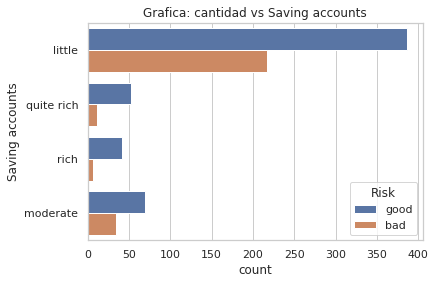

## Cantidad de deudores que poseen dinero guardado

Saving accounts
little             603
moderate           103
quite rich          63
rich                48
dtype: int64
nan                 183


## Cantidad de deudores que tienen dinero guardado por genero que poseen:

Saving accounts  Sex   
little           male      409
                 female    194
moderate         male       71
quite rich       male       47
moderate         female     32
rich             male       29
                 female     19
quite rich       female     16
dtype: int64


## Cantidad de deudores que tienen riesgo o no con cierta cantidad de dinero

Saving accounts  Risk
little           good    386
                 bad     217
moderate         good     69
quite rich       good     52
rich             good     42
moderate         bad      34
quite rich       bad      11
rich             bad       6
dtype: int64


## Cantidad de deudores que tienen dinero guardado por genero que poseen con cierta cantidad de dinero:

Saving accounts  Risk  Sex   
little           good  male      268
                 bad   male      141
                 good  female    118
                 bad   female     76
moderate         good  male       52
quite rich       good  male       40
rich             good  male       24
moderate         bad   male       19
rich             good  female     18
moderate         good  female     17
                 bad   female     15
quite rich       good  female     12
                 bad   male        7
rich             bad   male        5
quite rich       bad   female      4
rich             bad   female      1
dtype: int64
*******************************************************************************


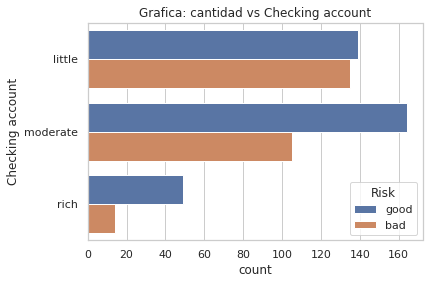

## Cantidad de deudores que poseen un tipo de targeta

Checking account
little              274
moderate            269
rich                 63
dtype: int64
nan                 394


## Cantidad de deudores que cuentan con un tipo de targeta por genero :

Checking account  Sex   
little            male      186
moderate          male      183
little            female     88
moderate          female     86
rich              male       43
                  female     20
dtype: int64


## Cantidad de deudores que cuentan con cierto tipo de riesgo :

Checking account  Risk
moderate          good    164
little            good    139
                  bad     135
moderate          bad     105
rich              good     49
                  bad      14
dtype: int64


## Cantidad de deudores que cuentan con cierto tipo de riesgo por genero

Checking account  Risk  Sex   
moderate          good  male      119
little            good  male       97
                  bad   male       89
moderate          bad   male       64
little            bad   female     46
moderate          good  female     45
little            good  female     42
moderate          bad   female     41
rich              good  male       33
                        female     16
                  bad   male       10
                        female      4
dtype: int64
*******************************************************************************


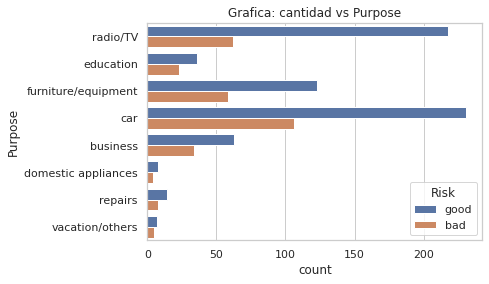

## Cantidad de productos que se quieren sacar a credito:

Purpose            
car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
dtype: int64
nan                 0


## Cantidad de productos que se quieren sacar a credito por genero:

Purpose              Sex   
car                  male      243
radio/TV             male      195
furniture/equipment  male      107
car                  female     94
radio/TV             female     85
business             male       78
furniture/equipment  female     74
education            male       35
                     female     24
business             female     19
repairs              male       17
vacation/others      male        9
domestic appliances  female      6
                     male        6
repairs              female      5
vacation/others      female      3
dtype: int64


## Cantidad de productos que se quieren sacar a credito segun el riesgo:

Purpose              Risk
car                  good    231
radio/TV             good    218
furniture/equipment  good    123
car                  bad     106
business             good     63
radio/TV             bad      62
furniture/equipment  bad      58
education            good     36
business             bad      34
education            bad      23
repairs              good     14
domestic appliances  good      8
repairs              bad       8
vacation/others      good      7
                     bad       5
domestic appliances  bad       4
dtype: int64


## Cantidad de productos que se quieren sacar a credito por genero segun el credito:

Purpose              Risk  Sex   
car                  good  male      177
radio/TV             good  male      152
furniture/equipment  good  male       77
car                  bad   male       66
radio/TV             good  female     66
car                  good  female     54
business             good  male       51
furniture/equipment  good  female     46
radio/TV             bad   male       43
car                  bad   female     40
furniture/equipment  bad   male       30
                           female     28
business             bad   male       27
education            good  male       21
radio/TV             bad   female     19
education            good  female     15
                     bad   male       14
business             good  female     12
repairs              good  male       11
education            bad   female      9
business             bad   female      7
repairs              bad   male        6
vacation/others      good  male        6
domestic appliances  go

## Cantidad de carros, televisiones y radios que los clientes desean adquirir

Purpose   Saving accounts  Risk  Sex   
car       little           good  male      91
radio/TV  little           good  male      84
car       little           bad   male      49
radio/TV  little           good  female    43
                           bad   male      28
car       little           bad   female    24
                           good  female    24
          moderate         good  male      22
radio/TV  quite rich       good  male      16
          little           bad   female    14
          moderate         good  male      10
car       rich             good  male      10
          quite rich       good  male      10
radio/TV  moderate         bad   male       8
car       rich             good  female     8
          moderate         bad   female     7
radio/TV  moderate         good  female     7
car       moderate         good  female     5
                           bad   male       5
radio/TV  rich             good  female     4
          quite rich       good  female 

In [ ]:
display(Markdown("# Exploración de las datos de las variables de categoricas:"))
#Se va a buscar las estadisticas de los datos de housing
sns.countplot(data = df, hue = 'Risk', y = 'Sex')
plt.title('Grafica: cantidad vs Sex')
plt.show()
display(Markdown("## Cantidad de deudores riesgosos y no riesgosos por genero:"))
print(df[['Risk','Sex']].value_counts())
print("*******************************************************************************")

Cols = ['Housing', 'Saving accounts', 'Checking account',"Purpose"]
Mark = ["## Cantidad de deudores que poseen una casa, rentan o ninguna:",
        "## Cantidad de deudores de los dos generos que poseen una casa, rentan o ninguna:",
        "## Cantidad de deudores con riesgos que poseen una casa, rentan o ninguna:",
        "## Cantidad de deudores con riesgos por genero que poseen una casa, rentan o ninguna:",
        "## Cantidad de deudores que poseen dinero guardado",
        "## Cantidad de deudores que tienen dinero guardado por genero que poseen:",
        "## Cantidad de deudores que tienen riesgo o no con cierta cantidad de dinero",
        "## Cantidad de deudores que tienen dinero guardado por genero que poseen con cierta cantidad de dinero:",
        "## Cantidad de deudores que poseen un tipo de targeta",
        "## Cantidad de deudores que cuentan con un tipo de targeta por genero :",
        "## Cantidad de deudores que cuentan con cierto tipo de riesgo :",
        "## Cantidad de deudores que cuentan con cierto tipo de riesgo por genero",
        "## Cantidad de productos que se quieren sacar a credito:",
        "## Cantidad de productos que se quieren sacar a credito por genero:",
        "## Cantidad de productos que se quieren sacar a credito segun el riesgo:",
        "## Cantidad de productos que se quieren sacar a credito por genero segun el credito:"]

#Se requiere hacer una visualización gráfica sobre los datos categorios
a=0
i=0
for atributo in Cols:
  sns.countplot(data = df, hue = 'Risk', y = atributo)
  plt.title('Grafica: cantidad vs '+atributo)
  plt.show()

  display(Markdown(Mark[a]))
  print(df[[atributo]].value_counts())
  print(f'nan                 {df[atributo].isnull().sum()}')
  a+=1

  display(Markdown(Mark[a]))
  print(df[[atributo,'Sex']].value_counts())
  a+=1

  display(Markdown(Mark[a]))
  print(df[[atributo,'Risk']].value_counts())
  a+=1

  display(Markdown(Mark[a]))
  print(df[[atributo,'Risk','Sex']].value_counts())
  a+=1

  print("*******************************************************************************")

display(Markdown("## Cantidad de carros, televisiones y radios que los clientes desean adquirir"))
filtro = df['Purpose']=='car'
df2=df.query("Purpose=='car' or Purpose=='radio/TV'")
print(df2[['Purpose','Saving accounts','Risk','Sex']].value_counts())

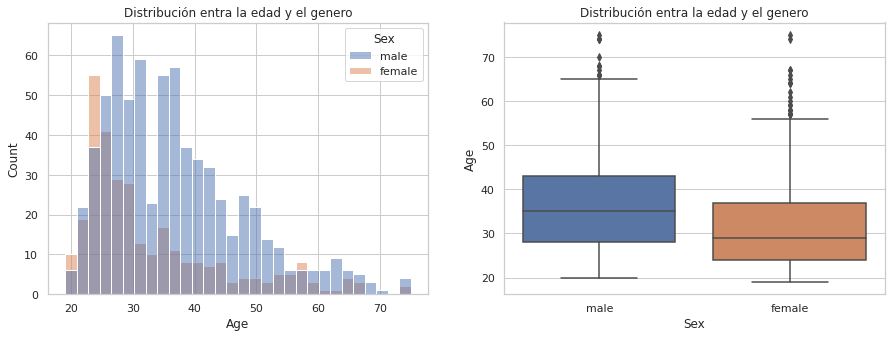

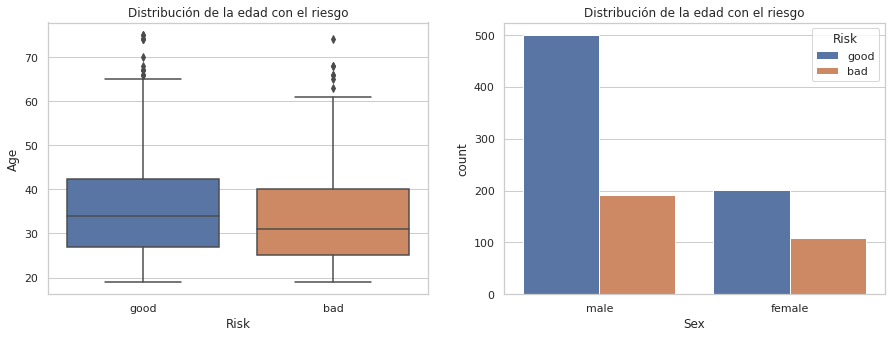

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.histplot(df, x='Age', bins=30, hue="Sex", ax=ax[0]).set_title("Distribución entra la edad y el genero");
sns.boxplot(data=df, x="Sex", y="Age", ax=ax[1]).set_title("Distribución entra la edad y el genero");

fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(data=df, x='Risk', y='Age', ax=ax[0]).set_title("Distribución de la edad con el riesgo");
sns.countplot(data=df, x="Sex", hue="Risk", ax=ax[1]).set_title("Distribución de la edad con el riesgo");

#### Observaciones sobre los datos
- La mayoria de deudores son varones (690) y es mas probables que sean un buen riesgo a comparación de las mujeres
- La mayoria de deudores son dueños de una casa (71,3%) y 52,7% son una buena oportunidad de riesgo
- Los hombres son dueños de mas casas que las mujeres
- La mayoria de personas tienen poco dinero ahorrado (60,3%) y muy pocos tienen una buena fortuna (11,1%)
- La mayoria de personas no cuentan con una cuenta de credito (39,4%)
- La mayoria de personas solicitan un credito con el proposito de adquirir un carro, radio o una televisión, de los cuales mas del 50% de los solicitantes son varones y 32,9% tienen un buen riesgo de credito

### Tratamiento de las variables categoricas

Se van a mostrar los valores unicos de las variables categoricas

In [ ]:
display(Markdown("### Exploración de las datos de las columnas de categoricas:"))
Cols = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Risk']
for col in Cols:
    line = "**" + col + ":** "
    for v in df[col].unique():
        line = line + str(v) + ", "
    display(Markdown(line))

### Exploración de las datos de las columnas de categoricas:

**Sex:** male, female, 

**Housing:** own, free, rent, 

**Saving accounts:** nan, little, quite rich, rich, moderate, 

**Checking account:** little, moderate, nan, rich, 

**Purpose:** radio/TV, education, furniture/equipment, car, business, domestic appliances, repairs, vacation/others, 

**Risk:** good, bad, 

#### Observaciones

- Se identifico que las columnas **Housing**, **Saving accounts** y **Checking account** son variables de datos ordinales, por lo que se va a proceder el metodo de `LabelEncoder()` de la biblioteca **sklearn** del modulo preprocessing
- Se identifica que las variables **Sex** y **Risk** son datos nominales, se decide usar el metodo `LabelEncoder()` aunque no son datos que tenga jerarquia
- Se usara el metodo `get_dummies()` para descomponer a la columna **Purpose**

#### Uso de los métodos para el tratamiento de las variables de texto

Se va usar los metodos antes mencionados para tratar las variables de categoricas, para los distintos tipos de datos (ordinales y nominales)

##### Datos ordinales
- Para los datos ordinales : Se puede hacer uso tanto de la biblioteca o de una función que le asigne un numero segun el texto que se ingrese, si coincide o no con el mismo. Incluso se puede realizar con una función lambda.

In [ ]:
#Se crea el objeto de label encoder
le = preprocessing.LabelEncoder()
df['Saving accounts']=le.fit_transform(df['Saving accounts'])
df['Checking account']=le.fit_transform(df['Checking account'])
df['Housing']=le.fit_transform(df['Housing'])

Función que realiza la misma codificación que el `LabelEncoder()`

In [ ]:
"""
Método que hace uso de la tecnica de codificación label encoder para pasar los datos ordinales en numericos
* Se recibe una variable string y se retorna el numero equivalente de la variable ordinal para las variables 
  Saving accounts y Checking account
"""
def SavingAcc_and_CheckingAcc_LabelEnc(text):
    if text == "little":
        return 1
    elif text == "moderate":
        return 2
    elif text == "quite rich":
        return 3
    elif text == "rich":
        return 4
    else:
        return 0

#df["Saving accounts"] = df["Saving accounts"].apply(SavingAcc_and_CheckingAcc_LabelEnc)
#df["Checking account"] = df["Checking account"].apply(SavingAcc_and_CheckingAcc_LabelEnc)

Se verifican los datos de las variables ordinales codificadas, como datos unicos y en las filas del dataset

In [ ]:
#Se muestran los datos unicos
display(Markdown("### Verificación de las datos de las variables de categoricas ordinales:"))
cols = ['Housing', 'Saving accounts', 'Checking account']
for col in cols:
    line = "**" + col + ":** "
    for v in df[col].unique():
        line = line + str(v) + ", "
    display(Markdown(line))

### Verificación de las datos de las variables de categoricas ordinales:

**Housing:** 1, 0, 2, 

**Saving accounts:** 4, 0, 2, 3, 1, 

**Checking account:** 0, 1, 3, 2, 

In [ ]:
#Se muestran las filas del dataset
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,1,4,0,1169,6,radio/TV,good
1,22,female,2,1,0,1,5951,48,radio/TV,bad
2,49,male,1,1,0,3,2096,12,education,good
3,45,male,2,0,0,0,7882,42,furniture/equipment,good
4,53,male,2,0,0,0,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,1,0,3,1736,12,furniture/equipment,good
996,40,male,3,1,0,0,3857,30,car,good
997,38,male,2,1,0,3,804,12,radio/TV,good
998,23,male,2,0,0,0,1845,45,radio/TV,bad


##### Datos nominales

Se va a dar numeros a las variables de datos nominales para representar su categorizacion, menos la variable purpose con el motivo de facilitar la lectura y apreciación de la tabla de correlacion


In [ ]:
df['Sex']=le.fit_transform(df['Sex'])#male 1,female 0
df['Risk']=le.fit_transform(df['Risk'])#good 1, bad 0

### Correlaciones

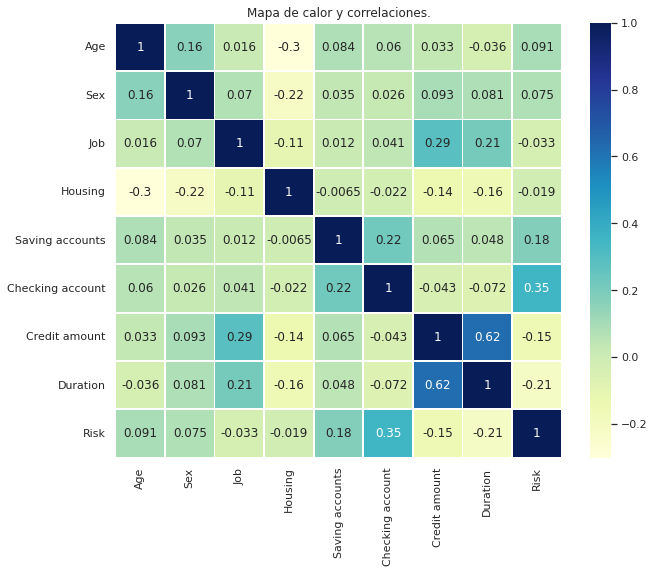

In [ ]:
corr = df.corr()
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(corr, cmap = "YlGnBu",linewidths=.8, annot = True).set_title("Mapa de calor y correlaciones.")
plt.show()


- Se denota que entre mas alta sea el monto de credito, mayor sera el tiempo del mismo
-

In [ ]:
# Se realizara uso de la función get_dummies() para la variable Purpose
df=pd.get_dummies(df)
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,67,1,2,1,4,0,1169,6,1,0,0,0,0,0,1,0,0
1,22,0,2,1,0,1,5951,48,0,0,0,0,0,0,1,0,0
2,49,1,1,1,0,3,2096,12,1,0,0,0,1,0,0,0,0
3,45,1,2,0,0,0,7882,42,1,0,0,0,0,1,0,0,0
4,53,1,2,0,0,0,4870,24,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,0,1,1,0,3,1736,12,1,0,0,0,0,1,0,0,0
996,40,1,3,1,0,0,3857,30,1,0,1,0,0,0,0,0,0
997,38,1,2,1,0,3,804,12,1,0,0,0,0,0,1,0,0
998,23,1,2,0,0,0,1845,45,0,0,0,0,0,0,1,0,0


Se va a pasar la variable dependiente a la ultima columna del dataset para facilitar el tratamineto y uso del dataset como en el cuaderno como en el modelo realizado en c++

In [ ]:
cols = list(df.columns)
#print(cols.index('Risk'))
cols[cols.index('Risk')]= cols[-1]
cols_new = list(cols)
cols_new.append('Risk')
df=df[cols_new]
display(Markdown("## Información del dataset"))
df.info()

8
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Age                          1000 non-null   int64
 1   Sex                          1000 non-null   int64
 2   Job                          1000 non-null   int64
 3   Housing                      1000 non-null   int64
 4   Saving accounts              1000 non-null   int64
 5   Checking account             1000 non-null   int64
 6   Credit amount                1000 non-null   int64
 7   Duration                     1000 non-null   int64
 8   Purpose_vacation/others      1000 non-null   uint8
 9   Purpose_business             1000 non-null   uint8
 10  Purpose_car                  1000 non-null   uint8
 11  Purpose_domestic appliances  1000 non-null   uint8
 12  Purpose_education            1000 non-null   uint8
 13  Purpose_furniture/equipment  1000 non-null   ui

Se verifica en el dataset el cambio realizado

In [ ]:
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose_vacation/others,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Risk
0,67,1,2,1,4,0,1169,6,0,0,0,0,0,0,1,0,0,1
1,22,0,2,1,0,1,5951,48,0,0,0,0,0,0,1,0,0,0
2,49,1,1,1,0,3,2096,12,0,0,0,0,1,0,0,0,0,1
3,45,1,2,0,0,0,7882,42,0,0,0,0,0,1,0,0,0,1
4,53,1,2,0,0,0,4870,24,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,0,1,1,0,3,1736,12,0,0,0,0,0,1,0,0,0,1
996,40,1,3,1,0,0,3857,30,0,0,1,0,0,0,0,0,0,1
997,38,1,2,1,0,3,804,12,0,0,0,0,0,0,1,0,0,1
998,23,1,2,0,0,0,1845,45,0,0,0,0,0,0,1,0,0,0


### Descarga del dataset procesado y analizado
Se pasa el dataset a un archivo .csv para realizar el modelo en c++ y realizar las correspondientes comparaciones entre los dos distintos lenguajes

In [ ]:
df.to_csv('german_credit_data.csv',sep=';')

## 3. Modelar usando la regresión logística usando Scikit-Learn

### Entrenamiento del modelo

In [ ]:
#Se separa en dos dataframes el dataset, en datos de entrenamiento y de prueba
train, test= train_test_split(df, test_size=0.2, random_state=42)

#Se pasan las variables independientes en X_train y X_test y las dependientes en y_train y y_test
X_train = train.drop('Risk',axis=1)
y_train = train['Risk']
X_test = test.drop('Risk',axis=1)
y_test = test['Risk']

#Se escalan los datos
X_train_scaled=MinMaxScaler().fit_transform(X_train)

#Se crea el modelo de regresión logistica y se entrena
model=LogisticRegression()
model.fit(X_train_scaled,y_train)

print(f'Coeficientes del modelo :\n{model.coef_}')
print(f'Interseccion del modelo :\n{model.intercept_}')

Coeficientes del modelo :
[[ 1.25732211  0.42147497 -0.42212808 -0.02577549  0.61551191  1.67375729
  -0.75883952 -1.43725939  0.05947401 -0.06640338 -0.04515828 -0.03290331
  -0.57429304  0.33533251  0.46813545 -0.14170833  0.05947401]]
Interseccion del modelo :
[0.03012963]


### Pruebas del modelo

In [ ]:
#Se escalan los datos de prueba
X_test_scaled=MinMaxScaler().fit_transform(X_test)

#Se usa el modelo para predecir los datos de prueba
y_predict_test=model.predict(X_test_scaled)


#### Metrcias de rendimiento
Se identifican los casos TP, FP, TN y FN en la matriz de confusión para despues realizar los calculos de la metricas del modelo 

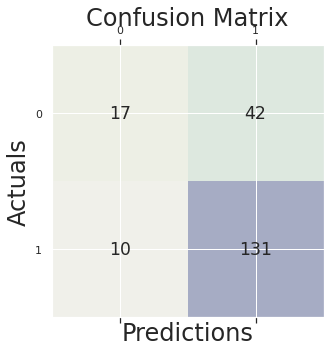

In [ ]:
# Se calcula la matriz de confusión
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_predict_test)

# Se imprime la matriz de confusión
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap="YlGnBu", alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='x-large')
 
plt.xlabel('Predictions', fontsize=24)
plt.ylabel('Actuals', fontsize=24)
plt.title('Confusion Matrix', fontsize=24)
plt.show()

In [ ]:
display(Markdown("## Metricas para el dataset de prueba:"))
precision = precision_score(y_test, y_predict_test)
recall = recall_score(y_test, y_predict_test)
print('Precision: %.3f' % precision)
print('Recall: %.3f' % recall)
print('Accuracy: %.3f' % accuracy_score(y_test, y_predict_test))
print('F1 Score: %.3f' % f1_score(y_test, y_predict_test))

display(Markdown("## Metricas para el dataset de entrenamiento:"))

y_predict_train=model.predict(X_train_scaled)
precision = precision_score(y_train, y_predict_train)
recall = recall_score(y_train, y_predict_train)
print('Precision: %.3f' % precision)
print('Recall: %.3f' % recall)
print('Accuracy: %.3f' % accuracy_score(y_train, y_predict_train))
print('F1 Score: %.3f' % f1_score(y_train, y_predict_train))

## Metricas para el dataset de prueba:

Precision: 0.757
Recall: 0.929
Accuracy: 0.740
F1 Score: 0.834


## Metricas para el dataset de entrenamiento:

Precision: 0.765
Recall: 0.894
Accuracy: 0.734
F1 Score: 0.824


Támbien se puede calcular usando la siguiente función

In [ ]:
def calculate_metrics(predicted, actual):
    TP, FP, TN, FN = 0, 0, 0, 0
    for i in range(len(predicted)):
        if   (predicted[i] == 0) & (actual[i] == 0):
            TP += 1
        elif (predicted[i] == 0) & (actual[i] == 1):
            FP += 1
        elif (predicted[i] == 1) & (actual[i] == 1):
            TN += 1
        else:
            FN += 1

    accuracy  = (TP + TN) / (TP + FP + TN + FN) 
    precision = (TP) / (TP + FP) 
    recall    = (TP) / (TP + FN) 
    f1_score  = (2 * precision * recall) / (precision + recall)
    
    return accuracy, precision, recall, f1_score

##### Conclusiones

- El modelo tiene una precisión arriba del 75% con los datos de entrenamiento y con los de prueba
- Hay una diferencia de 3% en el recall de ambos datasets
- El Accuracy es casi el mismo con ambos datasets
- El f1 score es el mimso en ambos datasets

Referencias usadas para realizar este objetivo:
- [Ejemplos de metricas de rendimiento en python](https://vitalflux.com/accuracy-precision-recall-f1-score-python-example/)

- [Documentación sobre las metricas de rendimiento](https://www.iartificial.net/precision-recall-f1-accuracy-en-clasificacion/)

## Comparación con el modelo de c++

Se va a comparar las metricas que se obtuvieron en los dos distintos lenguajes de programación



###Metricas de c++

<img src="https://github.com/DavidSArbelaez/Parcial3_Metricas_Rendimiento/blob/076d056fb608d0ce48cf9004d42007685f87de5f/Modelo_Regresi%C3%B3n_Logisitica/Imagenes/C++_Metricas.jpg?raw=true" width="600px" style="center; margin-top:200px"/>

- Se denota que el accuracy es mas constante y similar en python que en c++
- La precisión de c++ es muy baja, esta abajo del 70% en ambos datasets usados(prueba y entrenamiento)
- El recall en python es bastante alto mientras que en c++ esta abajo de 50%
- La precisión es muy baja en c++

Se determina que el modelo en python es mejor dado que tiene mejores metricas

##Conclusiones

* Se presento un data set para realizar un **EDA** y unas consultas sobre ese mimsmo dataframe.
* Se encontraron datos nulos en la columnas (`Saving accounts` y `Credit account` y se analizaron sus datos unicos y se concluyo usar el método label enconder para pasar sus datos categoricos ordinales en numeros que representen su jerarquia, dado que los datos nulos que contenian representaban que no se tenia dinero ahorrado y que no se contaba con una cuenta de credito.
* Se establecieron las relaciones entre varaibles.
* Se tienen 6 variables de datos categoricos del cual tambien hace parte la variable dependiente
* Se obtuvo los datos de las variables categoricas con subdivisiones de los datos para analizar cuantas personas tenian un buen y mal riesgo en función de su genero y la respectiva variable categorica y se determino que los hombres tenian una mayor cantidad de riesgo segiuro en cada categoria analizada
* Se concluyo que la mayoria de deudores usaban el credito para comprar un carro, una televisión o una radio
* Se hizo una distribución por edad y genero y se concluyo que 
* Se uso la tecnica de codificación `labelEncoder()` para los datos nominales menos la variable `Purpose` que se uso el metodo `get_dummies()`
* Se denota que entre mas alta sea el monto de credito, mayor sera el tiempo del mismo
* Se determina que el modelo en python es mejor dado que tiene mejores metricas, ya que en cada metrica supera a las de c++ en ambos datasets(prueba y entrenamiento), menos en el accuracy donde tiene una alta similitud

## Referencias
- [Ejemplos de metricas de rendimiento en python](https://vitalflux.com/accuracy-precision-recall-f1-score-python-example/)

- [Documentación sobre las metricas de rendimiento](https://www.iartificial.net/precision-recall-f1-accuracy-en-clasificacion/)
- [Ejemplo del tratamiento del modelo sobre este dataset](https://www.kaggle.com/code/lesleyding/german-credit-risk-analysis-and-modeling)
- [Dataset](https://www.kaggle.com/datasets/uciml/german-credit)
